# 03- Analysis of Head-to-Head LDC Fitness Competitions
##  Follow up experiments performed on the strain 7942_0863

Click here to go back to the <a href="0-Index.ipynb"> "Table of Contents" </a>

So, we decided to focus on the most promissing strain synpcc7942_0863 and reperform the high light (150uE) experiment again but instead of plating on to 24 well plates with 20 ul of serial dilutions, we would plate 100 ul onto a full petri plate.

In addition, we wanted to test if there was a relationship between the light intensity of the LD cycle and the competition outcome so we also did the experiment identically except for using 12-12h LDC with 30 uE instead of 150 uE

### Load Data

In [1]:
# Importing intrinsic libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

In [2]:
# Loading Pandas DataFrame:
data3 = pd.read_csv("../Datasets/_0863-wt_HL-LL.csv")
data3.head()

,strain,day,condition,percent-mutant,strain-condition
0,_0863,day 0,LDC high light,0.473118,_0863 LDC high light
1,_0863,day 0,LDC high light,0.406780,_0863 LDC high light
2,_0863,day 0,LDC high light,0.495468,_0863 LDC high light
3,_0863,day 0,LDC high light,0.562738,_0863 LDC high light
4,_0863,day 2,LDC high light,0.588889,_0863 LDC high light


In [3]:
# Lets subset the data into our CLC and LDC results
data3_HL = data3[data3.condition == "LDC high light"]
data3_LL = data3[data3.condition == "LDC low light"]
data3_clc = data3[data3.condition == "CLC"]

# First lets plot all three conditions on the same  graph: 

### Make the bar graph

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

_0863 LDC high light_day 0 v.s. _0863 LDC high light_day 2: t-test independent samples, P_val=3.628e-02 stat=-2.685e+00
_0863 LDC high light_day 2 v.s. _0863 LDC high light_day 6: t-test independent samples, P_val=2.645e-03 stat=-4.924e+00
_0863 LDC high light_day 0 v.s. _0863 LDC high light_day 6: t-test independent samples, P_val=3.747e-06 stat=-1.603e+01
pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

_0863 LDC low light_day 0 v.s. _0863 LDC low light_day 2: t-test independent samples, P_val=1.075e-01 stat=-1.891e+00
_0863 LDC low light_day 2 v.s. _0863 LDC low light_day 6: t-test independent samples, P_val=4.364e-01 stat=8.337e-01
_0863 LDC low light_day 0 v.s. _0863 LDC low light_day 6: t-test independent sa

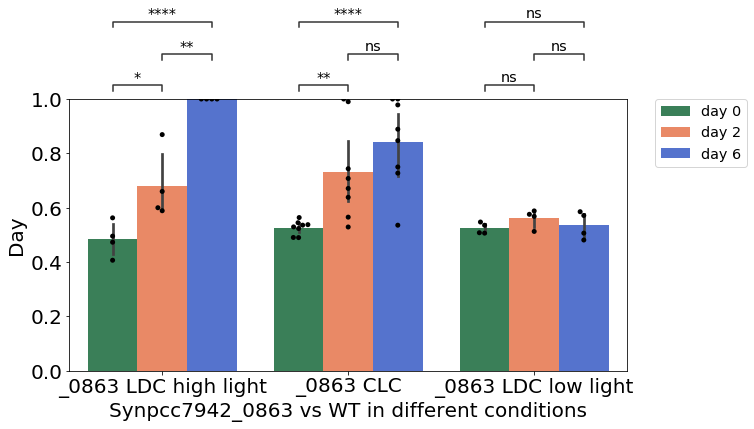

In [7]:
# Set variables you want to plot
plt.figure(figsize=(10,5))

x = "strain-condition"
y = "percent-mutant"
order=["day 0", "day 2", "day 6"]



barplot3highlow = sns.barplot(data=data3, x=x, y=y, hue="day", hue_order=order,
                       palette=sns.color_palette(['seagreen', 'coral', 'royalblue']))

swarmplot3 = sns.swarmplot(data=data3, x=x, y=y, hue='day' ,dodge=True, 
               palette=sns.color_palette(['black', 'black', 'black']), hue_order=order)

handles, labels = swarmplot3.get_legend_handles_labels()
barplot3highlow.legend(handles[3:], labels[3:], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='x-large', title_fontsize='40')

# control x and y limits
barplot3highlow.set(ylim=(0, 1))
swarmplot3.set(ylim=(0, 1))
barplot3highlow.axes.set_title("",fontsize=20)
barplot3highlow.set_xlabel("Synpcc7942_0863 vs WT in different conditions",fontsize=20)
barplot3highlow.set_ylabel("Day",fontsize=20)
barplot3highlow.tick_params(labelsize=20)

stat_lowlight = add_stat_annotation(barplot3highlow, data=data3, x=x, y=y, hue="day",
                    boxPairList=[(("_0863 LDC high light", "day 0"), ("_0863 LDC high light", "day 2")),
                                 (("_0863 LDC high light", "day 2"), ("_0863 LDC high light", "day 6")),
                                 (("_0863 LDC high light", "day 0"), ("_0863 LDC high light", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_lowlight = add_stat_annotation(barplot3highlow, data=data3, x=x, y=y, hue="day",
                    boxPairList=[(("_0863 LDC low light", "day 0"), ("_0863 LDC low light", "day 2")),
                                 (("_0863 LDC low light", "day 2"), ("_0863 LDC low light", "day 6")),
                                 (("_0863 LDC low light", "day 0"), ("_0863 LDC low light", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=2, fontsize='x-large')

stat_lowlight = add_stat_annotation(barplot3highlow, data=data3, x=x, y=y, hue="day",
                    boxPairList=[(("_0863 CLC", "day 0"), ("_0863 CLC", "day 2")),
                                 (("_0863 CLC", "day 2"), ("_0863 CLC", "day 6")),
                                 (("_0863 CLC", "day 0"), ("_0863 CLC", "day 6"))],
                    test='t-test_ind', textFormat='star', loc='outside', verbose=5, fontsize='x-large')




## Click here to continue to <a href="04-Strain0863-growth.ipynb"> "Data on growth in LDC individually" </a>

### Or if you want to print the figures:

In [6]:
barplot3highlow = barplot3highlow.get_figure()  
barplot3highlow.savefig('Figures/barplot3highlow.png', dpi=400, bbox_inches="tight")